In [93]:
import requests
import json

import pyarrow

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

### Read data from public API and concatenate all the years of data.

Can we have the API without limit ? 
https://stackoverflow.com/questions/40745338/whats-the-pattern-to-request-for-all-records-using-restful-app

In [95]:
# The default limit is 100 rows. 
# how to know the upper limit 
# code it such that all the rows are extracted. &limit=50000
max_limit = 10000000
url_1990_1999 = 'https://data.gov.sg/api/action/datastore_search?resource_id=adbbddd3-30e2-445f-a123-29bee150a6fe&limit={}'.format(max_limit)
url_2000_2012 = 'https://data.gov.sg/api/action/datastore_search?resource_id=8c00bf08-9124-479e-aeca-7cc411d884c4&limit={}'.format(max_limit)
url_2012_2014 = 'https://data.gov.sg/api/action/datastore_search?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b&limit={}'.format(max_limit)
url_2015_2016 = 'https://data.gov.sg/api/action/datastore_search?resource_id=1b702208-44bf-4829-b620-4615ee19b57c&limit={}'.format(max_limit)
url_2017_present = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&limit={}'.format(max_limit)


url_list = [url_1990_1999, url_2000_2012, url_2012_2014, url_2015_2016, url_2017_present]

initial_df = pd.DataFrame({'month':[],
                            'town':[],
                            'flat_type': [], 
                            'block': [], 
                            'street_name': [], 
                            'storey_range': [], 
                            'floor_area_sqm':[], 
                            'flat_model': [], 
                            'lease_commence_date':[], 
                            'remaining_lease':[], 
                            'resale_price':[]})

for url in url_list: 
    print(url)
    data = requests.get(url).text
    final = json.loads(data)['result']['records']
    df = pd.DataFrame(final)
    initial_df = pd.concat((initial_df,df), axis=0)
    # concat the dataframes along the rows. 


    # Next task is to combine the block number and the street number to get the lat/long coordinates. 



https://data.gov.sg/api/action/datastore_search?resource_id=adbbddd3-30e2-445f-a123-29bee150a6fe&limit=10000000
https://data.gov.sg/api/action/datastore_search?resource_id=8c00bf08-9124-479e-aeca-7cc411d884c4&limit=10000000
https://data.gov.sg/api/action/datastore_search?resource_id=83b2fc37-ce8c-4df4-968b-370fd818138b&limit=10000000
https://data.gov.sg/api/action/datastore_search?resource_id=1b702208-44bf-4829-b620-4615ee19b57c&limit=10000000
https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&limit=10000000


In [96]:
initial_df.head()
initial_df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,_id
132543,2022-08,YISHUN,5 ROOM,357,YISHUN RING RD,04 TO 06,122,Improved,1988,65 years 01 month,545000,132544.0
132544,2022-08,YISHUN,5 ROOM,299,YISHUN ST 20,07 TO 09,111,Improved,2000,77 years 04 months,580000,132545.0
132545,2022-08,YISHUN,5 ROOM,334C,YISHUN ST 31,01 TO 03,112,Improved,2015,92 years 04 months,560000,132546.0
132546,2022-08,YISHUN,5 ROOM,333A,YISHUN ST 31,10 TO 12,112,Improved,2015,92 years 04 months,578000,132547.0
132547,2022-08,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122,Improved,1987,63 years 08 months,608000,132548.0


Get metadata on the columns here https://data.gov.sg/dataset/resale-flat-prices?resource_id=1b702208-44bf-4829-b620-4615ee19b57c

### Convert the CSV into Parquet

In [97]:
initial_df.to_parquet('./initial_df.parquet')

In [98]:
initial_parquet = pd.read_parquet('./initial_df.parquet')

In [99]:
initial_parquet.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,_id
132543,2022-08,YISHUN,5 ROOM,357,YISHUN RING RD,04 TO 06,122,Improved,1988,65 years 01 month,545000,132544.0
132544,2022-08,YISHUN,5 ROOM,299,YISHUN ST 20,07 TO 09,111,Improved,2000,77 years 04 months,580000,132545.0
132545,2022-08,YISHUN,5 ROOM,334C,YISHUN ST 31,01 TO 03,112,Improved,2015,92 years 04 months,560000,132546.0
132546,2022-08,YISHUN,5 ROOM,333A,YISHUN ST 31,10 TO 12,112,Improved,2015,92 years 04 months,578000,132547.0
132547,2022-08,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122,Improved,1987,63 years 08 months,608000,132548.0


In [100]:
initial_parquet.info()
# check unique values for town and clean up any consistency errors. 
# check unique values for story range 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878751 entries, 0 to 132547
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                878751 non-null  object 
 1   town                 878751 non-null  object 
 2   flat_type            878751 non-null  object 
 3   block                878751 non-null  object 
 4   street_name          878751 non-null  object 
 5   storey_range         878751 non-null  object 
 6   floor_area_sqm       878751 non-null  object 
 7   flat_model           878751 non-null  object 
 8   lease_commence_date  878751 non-null  object 
 9   remaining_lease      169701 non-null  object 
 10  resale_price         878751 non-null  object 
 11  _id                  878751 non-null  float64
dtypes: float64(1), object(11)
memory usage: 87.2+ MB


In [101]:
initial_parquet_copy = initial_parquet.copy()

In [102]:
# Convert the month column into datetime
initial_parquet_copy['month_year']= pd.to_datetime(initial_parquet_copy['month'], format = '%Y-%m')

# Parse month_year into resale year and resale month. 
initial_parquet_copy['resale_year'] = initial_parquet_copy['month_year'].dt.year
initial_parquet_copy['resale_month'] = initial_parquet_copy['month_year'].dt.month

# change the data format type
initial_parquet_copy['floor_area_sqm'] = initial_parquet_copy['floor_area_sqm'].astype('float')
initial_parquet_copy['resale_price'] = initial_parquet_copy['resale_price'].astype('float')
# initial_parquet_copy.drop(['_id'], inplace=True)

# type of columns 
float_columns = ['floor_area_sqm', 'resale_price']
object_columns = ['town', 'flat_type', 'storey_range', 'flat_model']

for col in object_columns: 
    initial_parquet_copy[col] = initial_parquet_copy[col].astype('category')

# in flat_type, replace multi generation with multi-generation. 
replace_map_flat_type = {'flat_type':{'MULTI GENERATION': 'MULTI-GENERATION'}}
initial_parquet_copy.replace(replace_map_flat_type, inplace=True)


initial_parquet_copy['flat_model'] = initial_parquet_copy['flat_model'].str.upper()
replace_map_flat_model = {'flat_model':{'MULTI GENERATION': 'MULTI-GENERATION'}}
initial_parquet_copy.replace(replace_map_flat_model, inplace=True)

for col in object_columns: 
    print(list(initial_parquet_copy[col].unique()))


# Have to encode the storey ranges. 
# 


['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'GEYLANG', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL']
['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15', '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30', '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51']
['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI-GENERATION', 'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE', 'MODE

In [103]:
initial_parquet_copy.describe(include='category').transpose()

,count,unique,top,freq
town,878751,27,TAMPINES,76783
flat_type,878751,7,4 ROOM,331333
storey_range,878751,25,04 TO 06,221538


<AxesSubplot:>

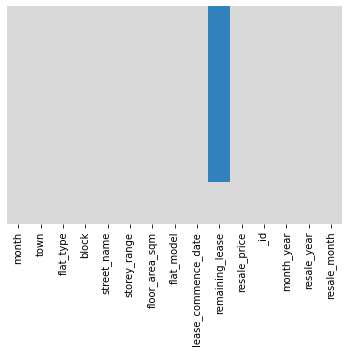

In [104]:
sns.heatmap(initial_parquet_copy.isna(), yticklabels=False, cbar=False,cmap = 'tab20c_r')

### Q1. Flat sizes have gone smaller over the years. Verify the claim with the use of data.

In [105]:
# Plot the distribution for all the flat types, over the years. 
# check if the mean of the flatsize for each of the flat size has been decreasing ? 

# group by flat type and for the particular year. 
initial_parquet_grouped = round(initial_parquet_copy.groupby(['lease_commence_date', 'flat_type'], as_index=False)['floor_area_sqm'].mean(),2)
initial_parquet_grouped


,lease_commence_date,flat_type,floor_area_sqm
0,1966,1 ROOM,NaN
1,1966,2 ROOM,NaN
2,1966,3 ROOM,67.53
3,1966,4 ROOM,NaN
4,1966,5 ROOM,NaN
...,...,...,...
373,2019,3 ROOM,67.92
374,2019,4 ROOM,91.18
375,2019,5 ROOM,113.00
376,2019,EXECUTIVE,NaN


In [106]:

plt.figure(figsize=(20,10))
# plt.xticks(rotation=90, fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel('Lease Commence Date', fontsize=20)
# plt.ylabel('Floor Area (sqm)', fontsize=20)
px.line(x='lease_commence_date', y='floor_area_sqm', color='flat_type', data_frame = initial_parquet_grouped, markers=True,
            labels={
                                "lease_commence_date": "Lease Commence Date",
                                "floor_area_sqm": "Flat Size",
                                "flat_type": "Flat Type"
                            },
                            title="Flat Size over the years")


<Figure size 1440x720 with 0 Axes>

1. Huge drop in the flat size area since 1996 (mid-1990s). 
2. 2009 -> 2010 : there was an increase in the area of the flat size. 
3. There is no siginicant decline in the flat size since 2012 to 2019. 
4. 1-room and Multi-generation flats are less common nowadays. 

### Q2. using DID, check if the emergence of Downtown Railway Line (DTL) from 2007-2015, led to an increase in the prices around the vicinity areas (Bukit Timah, Bukit Panjang and Bukit Batok) of the train line. 

In [155]:
# DTL Stage 2 stations: Cashew, Hillview, Beauty World, King Albert Park, Sixth Avenie, Tan Kah Kee 
# DTL Stage 2 areas: Bukit Batok, Bukit Panjang, Bukit Timah. 
# Filter the 4-room and the 5-room flats in the above areas. 

def dtl_year(row):
    if row['resale_year'] >= 2008 and row['resale_year'] <= 2015:
        return 1
    else:
        return 0 

def dtl_town(row):
    if row['town'] =='BUKIT PANJANG' or row['town'] =='BUKIT TIMAH' or row['town'] =='BUKIT BATOK':
        return 1 
    else: 
        return 0 

initial_parquet_copy_test = initial_parquet_copy.copy()

initial_parquet_copy_test['dtl_year'] = initial_parquet_copy_test.apply(dtl_year, axis=1)
initial_parquet_copy_test['dtl_town'] = initial_parquet_copy_test.apply(dtl_town, axis=1)
initial_parquet_copy_test['dtl_town_year'] = initial_parquet_copy_test['dtl_town'] * initial_parquet_copy['dtl_year']

initial_parquet_copy_test = initial_parquet_copy_test[(initial_parquet_copy_test['flat_type'] == '4 ROOM') 
| (initial_parquet_copy_test['flat_type'] == '5 ROOM')]

# Dependent Variable: Price per square meter of the flat area.
initial_parquet_copy_test['psf'] = initial_parquet_copy_test['resale_price']/initial_parquet_copy_test['floor_area_sqm']
initial_parquet_copy_test.head()


# calculate the psf for these areas. 
# dummy variables. 
# psf of the remaining areas. 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,_id,month_year,resale_year,resale_month,dtl_year,dtl_town,dtl_town_year,psf
104,1990-01,ANG MO KIO,4 ROOM,211,ANG MO KIO AVE 3,04 TO 06,81.0,NEW GENERATION,1977,None,80000.0,105.0,1990-01-01,1990,1,0,0,0,987.654321
105,1990-01,ANG MO KIO,4 ROOM,209,ANG MO KIO AVE 3,07 TO 09,91.0,NEW GENERATION,1977,None,72000.0,106.0,1990-01-01,1990,1,0,0,0,791.208791
106,1990-01,ANG MO KIO,4 ROOM,231,ANG MO KIO AVE 3,04 TO 06,92.0,NEW GENERATION,1977,None,72000.0,107.0,1990-01-01,1990,1,0,0,0,782.608696
107,1990-01,ANG MO KIO,4 ROOM,308,ANG MO KIO AVE 1,10 TO 12,92.0,NEW GENERATION,1976,None,86000.0,108.0,1990-01-01,1990,1,0,0,0,934.782609
108,1990-01,ANG MO KIO,4 ROOM,254,ANG MO KIO AVE 4,10 TO 12,97.0,NEW GENERATION,1977,None,72000.0,109.0,1990-01-01,1990,1,0,0,0,742.268041


### Check the plot

In [154]:
graphed = initial_parquet_copy_test.groupby(['resale_year', 'dtl_town'], as_index=False)['psf'].median()

plt.figure(figsize=(20,10))

px.line(data_frame=graphed, x='resale_year', y='psf', color='dtl_town')

<Figure size 1440x720 with 0 Axes>

1. Prior to 2007-2015, the difference in the psf for DTL and non-DTL town areas was large. 
2. During the treatment period, when the DTL line was built, the psf for DTL and non-DTL lines came significantly close

### DID Regression Model

In [151]:
x = initial_parquet_copy_test.iloc[:,-4:-1]
y = initial_parquet_copy_test.iloc[:,-1]

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
model.coef_

array([ 976.47894579, -317.51710007,   84.96230602])

In [152]:
# Model to get the summary statistics
import statsmodels.api as sm

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    psf   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:47:35   Log-Likelihood:            -4.4244e+06
No. Observations:              515556   AIC:                         8.849e+06
Df Residuals:                  515552   BIC:                         8.849e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3120.4948      2.132   1463.878

1. the coefficient for the interaction term is positive indicating that there is a lift in the prices when the DTL was built and for the vicinity towns near DTL line. 
2. However, the Adjusted R2 is 0.096 (quite low), variance is the data is not accounted by the model.

In [173]:
# DTL_year, DTL_town, DTL_town_year
# Not DTL not 2007-2015

# treated = 0 | find the difference across the time
X_no_dtl_year_no_dtl_town = [1,0,0,0]
X_dtl_year_no_dtl_town = [1,1,0,0]
Y_no_dtl_year_no_dtl_town = est2.predict(X_no_dtl_year_no_dtl_town)
Y_dtl_year_no_dtl_town = est2.predict(X_dtl_year_no_dtl_town)


D1 = Y_dtl_year_no_dtl_town - Y_no_dtl_year_no_dtl_town

X_no_dtl_year_dtl_town = [1,0,1,0]
X_dtl_year_dtl_town = [1,1,1,1]
Y_no_dtl_year_dtl_town = est2.predict(X_no_dtl_year_dtl_town)
Y_dtl_year_dtl_town = est2.predict(X_dtl_year_dtl_town)

D2 = Y_dtl_year_dtl_town  - Y_no_dtl_year_dtl_town


print(D2-D1)

[84.96230602]


In [ ]:
dtl_town_year has positive coefficient. 